##### Kunjal Shah
##### kunjal2001@hotmail.com
##### +919757429350

### Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import string
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from collections import Counter

### Loading the Dataset

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data

ItemID  Sentiment                                      SentimentText
0           1          0                       is so sad for my APL frie...
1           2          0                     I missed the New Moon trail...
2           3          1                            omg its already 7:30 :O
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4           5          0           i think mi bf is cheating on me!!!   ...
...       ...        ...                                                ...
99984   99996          0  @Cupcake  seems like a repeating problem   hop...
99985   99997          1  @cupcake__ arrrr we both replied to each other...
99986   99998          0                     @CuPcAkE_2120 ya i thought so 
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...
99988  100000          1                    @cupcake_kayla haha yes you do 

[99989 rows x 3 columns]

### Basic Dataset Description 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
data.describe()

ItemID     Sentiment
count   99989.000000  99989.000000
mean    50005.110042      0.564632
std     28865.894393      0.495808
min         1.000000      0.000000
25%     25009.000000      0.000000
50%     50006.000000      1.000000
75%     75003.000000      1.000000
max    100000.000000      1.000000

In [6]:
data.value_counts()

ItemID  Sentiment  SentimentText                                                                                                                                   
1       0                               is so sad for my APL friend.............                                                                                       1
66656   0          @bluemoonx I did too...whatever u do, don't watch &quot;2 girls 1 cup&quot; on youtube. Gross!!! Lesbos sucking tits and eating their own crap.     1
66678   0          @blues_traveler I want the Tix!  Oh, right.  I'm know where near Vacaville Ca.                                                                      1
66677   0          @bluereadergal I prolly won't be home till 3-4am at this rate                                                                                       1
66676   1          @bluerain22 thank you  *hugs* it was lovely and romantic!                                                                                    

In [7]:
data.dtypes

ItemID            int64
Sentiment         int64
SentimentText    object
dtype: object

In [8]:
data.shape

(99989, 3)

In [9]:
data.columns

Index(['ItemID', 'Sentiment', 'SentimentText'], dtype='object')

In [10]:
data.var()

ItemID       8.332399e+08
Sentiment    2.458251e-01
dtype: float64

In [11]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()

### Finding the number of words, characters and average length of word in the Sentiment Text

In [12]:
data1["word_count"]=data1['SentimentText'].apply(lambda x: len(str(x).split(" ")))
data1["character_count"]=data1["SentimentText"].str.len()
def avg_word(sentence):
    words=sentence.split()
    return(sum(len(word) for word in words)/len(words))
data1["word_length"]=data1["SentimentText"].apply(lambda x: avg_word(x))
data1

ItemID  Sentiment                                      SentimentText  \
0           1          0                       is so sad for my APL frie...   
1           2          0                     I missed the New Moon trail...   
2           3          1                            omg its already 7:30 :O   
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4           5          0           i think mi bf is cheating on me!!!   ...   
...       ...        ...                                                ...   
99984   99996          0  @Cupcake  seems like a repeating problem   hop...   
99985   99997          1  @cupcake__ arrrr we both replied to each other...   
99986   99998          0                     @CuPcAkE_2120 ya i thought so    
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...   
99988  100000          1                    @cupcake_kayla haha yes you do    

       word_count  character_count  word_length  
0              28               61     4.857143  
1              25               51     4.500000  
2              19               37     3.800000  
3              36              132     3.880000  
4              24               53     3.333333  
...           ...              ...          ...  
99984          15               78     5.333333  
99985          27              138     4.307692  
99986           6               30     5.000000  
99987          12               61     4.545455  
99988           6               31     5.200000  

[99989 rows x 6 columns]

### Checking for Null Values

In [13]:
data.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

In [14]:
data.isnull().any()

ItemID           False
Sentiment        False
SentimentText    False
dtype: bool

### Looking at random tweets 

In [15]:
rand_indexs = np.random.randint(1,len(data),30).tolist()
data["SentimentText"][rand_indexs]

39909    @andrea_r no, I missed that! Is there a websit...
84947    @chrisbrogan Indeed  Just started Crushin it @...
21011    @_ancthist thanks, yeah found a coin of Legio ...
30531                    @adMike I know  I need a carer...
22711    @0summerbreeze0 He had an album come out like ...
33512    @Ainz90   i'll kick you then hehe what up lill...
98103                             @conc3p  yay fic fic fic
33315    @aListDaDon My Night Was Pretty Good. Got Home...
30140    @alanreimer i know, but poor pidgy. hope he do...
21554    @_decode_ I'm not sure. It might be carpal tun...
28114    @AbbieH5 any more info from Mashhad? I have lo...
95355    @craigyd I am so sorry, I didn't twist it that...
8756     &quot;Even a turkey can fly in a tornado.&quot...
78965                 @callumbond indeed followed by Saw! 
7978               #squarespace cos I justhad a tooth out 
58920    @benjaminfolds http://twitpic.com/6uth1 - What...
38967    @altrot, hey man sorry to hear about your G-ma.

### Exploratory Data Analysis and Visualization

In [16]:
data.corr()

ItemID  Sentiment
ItemID     1.000000   0.079739
Sentiment  0.079739   1.000000

#### HEATMAP
A heatmap is a graphical representation of data in two-dimension, using colors to demonstrate different factors. Heatmaps are a helpful visual aid for a viewer, enabling the quick dissemination of statistical or data-driven information.

<AxesSubplot:>

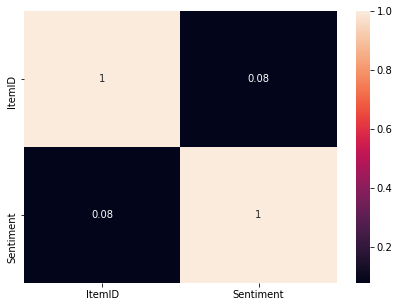

In [17]:
plt.figure(figsize = (7,5))
sns.heatmap(data.corr(), annot =True)

#### HISTPLOT
Histograms represent the data distribution by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin. 

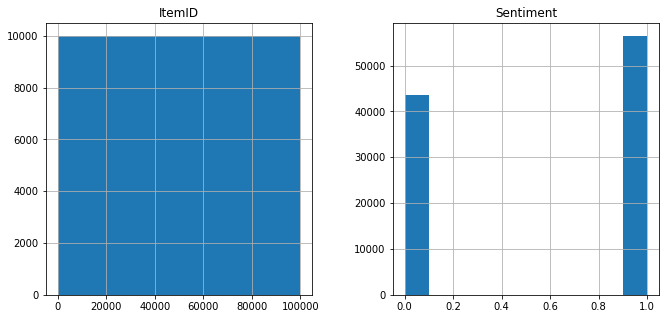

In [18]:
data3.hist(figsize=(11,5))
plt.show()

#### BARPLOT
A barplot (or barchart) is one of the most common types of graphic. It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.

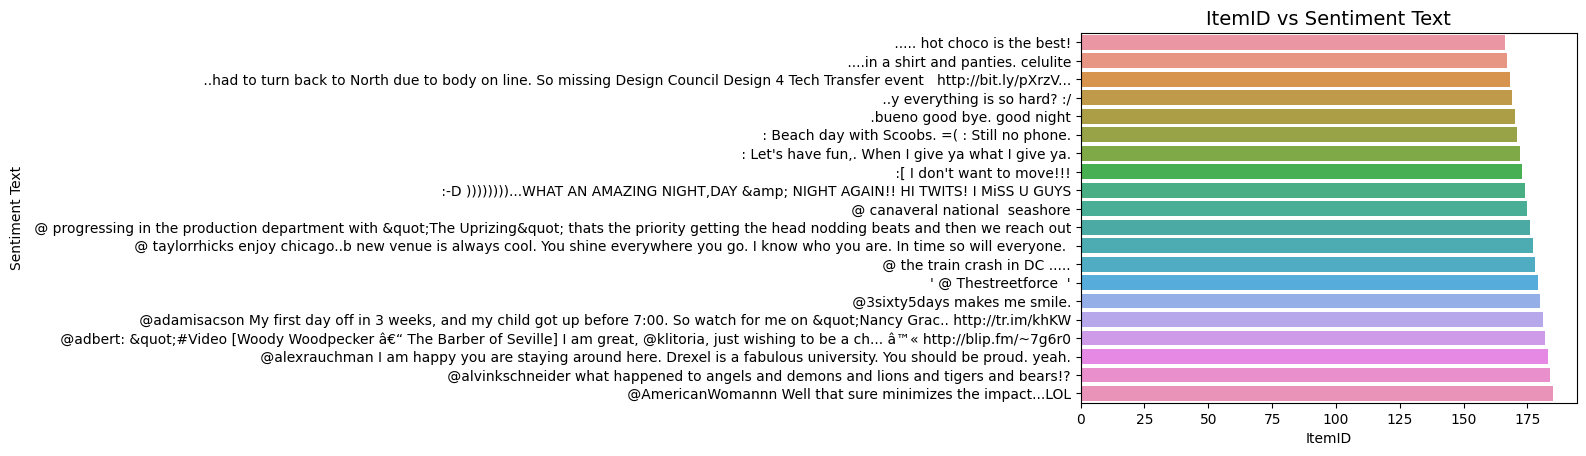

In [19]:
plt.style.use("default")
sns.barplot(x="ItemID", y="SentimentText",data=data[165:185])
plt.title("ItemID vs Sentiment Text",fontsize=14)
plt.xlabel("ItemID")
plt.ylabel("Sentiment Text")
plt.show()

#### PAIRPLOT
pairplot() : To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

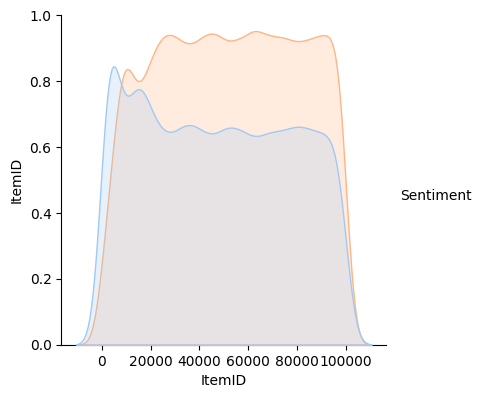

In [20]:
sns.set_palette("Paired")
sns.pairplot(data,hue='Sentiment',height=4, palette='pastel')
plt.show()

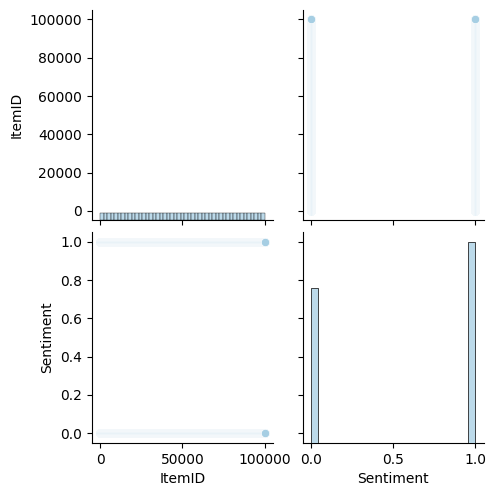

In [21]:
sns.pairplot(data)

#### NLTK
NLTK is a standard python library that provides a set of diverse algorithms for NLP. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.

In [22]:
import nltk
import scikitplot as skplt
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunjal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finding out the frequency of stopwords, hashtags and numeric data in the sentiment text.

Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. 

In [23]:
data2["stop_words"]=data2["SentimentText"].apply(lambda x: len([x for x in x.split() if x in stop]))
data2["hashtags"]=data2["SentimentText"].apply(lambda x: len([x for x in x.split() if x.startswith("#")]))
data2["numerics"]=data2["SentimentText"].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data2

ItemID  Sentiment                                      SentimentText  \
0           1          0                       is so sad for my APL frie...   
1           2          0                     I missed the New Moon trail...   
2           3          1                            omg its already 7:30 :O   
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4           5          0           i think mi bf is cheating on me!!!   ...   
...       ...        ...                                                ...   
99984   99996          0  @Cupcake  seems like a repeating problem   hop...   
99985   99997          1  @cupcake__ arrrr we both replied to each other...   
99986   99998          0                     @CuPcAkE_2120 ya i thought so    
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...   
99988  100000          1                    @cupcake_kayla haha yes you do    

       stop_words  hashtags  numerics  
0               4         0         0  
1               1         0         0  
2               1         0         0  
3               7         0         1  
4               3         0         0  
...           ...       ...       ...  
99984           3         0         0  
99985          12         0         0  
99986           2         0         0  
99987           4         0         0  
99988           2         0         0  

[99989 rows x 6 columns]

Finding the most frequent words in the sentiment text

In [24]:
freq1=pd.Series(' '.join(data2["SentimentText"]).split()).value_counts()[:25]
freq1

I       32880
to      28810
the     28088
a       21321
you     21180
i       16000
and     14565
it      12819
my      12385
for     12149
in      11199
is      11185
of      10326
that     9181
on       9020
have     8991
me       8255
so       7612
but      7220
be       7093
was      6912
I'm      6416
your     6028
not      5986
just     5770
dtype: int64

Text(0, 0.5, 'Frequency')

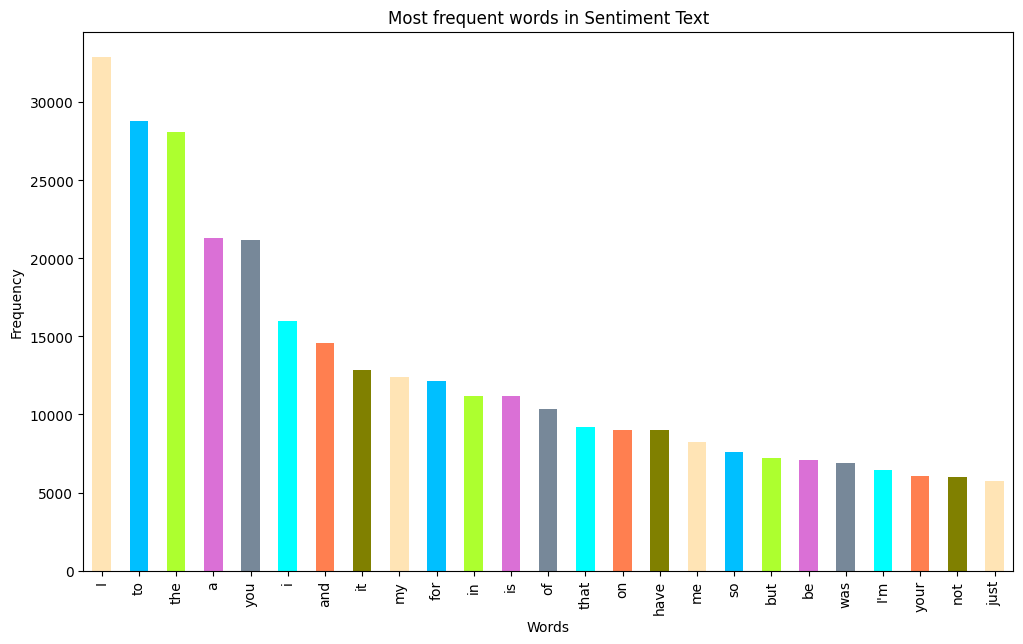

In [25]:
freq1.plot(kind="bar", color=['moccasin','deepskyblue','greenyellow','orchid','lightslategrey','cyan','coral','olive'], figsize =(12,7))
plt.title("Most frequent words in Sentiment Text")
plt.xlabel("Words")
plt.ylabel("Frequency")

Removing stopwords and other unrequired characters from the Sentiment Text

In [26]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in stop)
    return text
data3['clean_text'] = data3['SentimentText'].apply(clean_text)
data3

ItemID  Sentiment                                      SentimentText  \
0           1          0                       is so sad for my APL frie...   
1           2          0                     I missed the New Moon trail...   
2           3          1                            omg its already 7:30 :O   
3           4          0            .. Omgaga. Im sooo  im gunna CRy. I'...   
4           5          0           i think mi bf is cheating on me!!!   ...   
...       ...        ...                                                ...   
99984   99996          0  @Cupcake  seems like a repeating problem   hop...   
99985   99997          1  @cupcake__ arrrr we both replied to each other...   
99986   99998          0                     @CuPcAkE_2120 ya i thought so    
99987   99999          1  @Cupcake_Dollie Yes. Yes. I'm glad you had mor...   
99988  100000          1                    @cupcake_kayla haha yes you do    

                                              clean_text  
0                                         sad apl friend  
1                                missed new moon trailer  
2                                       omg already 7 30  
3      omgaga im sooo im gunna cry dentist since 11 s...  
4                                   think mi bf cheating  
...                                                  ...  
99984  cupcake seems like repeating problem hope able...  
99985  cupcake arrrr replied different tweets time se...  
99986                            cupcake 2120 ya thought  
99987                    cupcake dollie yes yes glad fun  
99988                             cupcake kayla haha yes  

[99989 rows x 4 columns]

Finding the most frequent words in the cleaned text

In [27]:
freq=pd.Series(' '.join(data3["clean_text"]).split()).value_counts()[:25]
freq

quot      9153
good      5927
like      5541
lol       5400
get       5312
u         5268
know      4610
love      4535
thanks    4118
one       3759
go        3648
day       3498
see       3260
amp       3177
well      3174
http      3097
time      3089
got       3029
im        2978
oh        2959
think     2890
haha      2882
really    2791
going     2688
hope      2681
dtype: int64

Text(0, 0.5, 'Frequency')

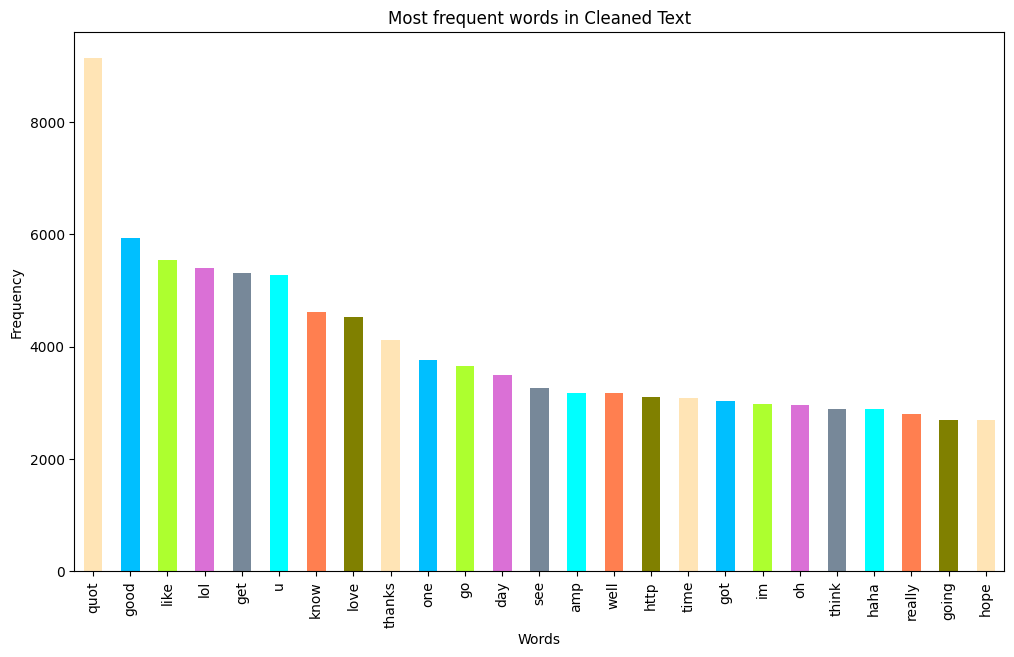

In [28]:
freq.plot(kind="bar", color=['moccasin','deepskyblue','greenyellow','orchid','lightslategrey','cyan','coral','olive'], figsize=(12,7))
plt.title("Most frequent words in Cleaned Text")
plt.xlabel("Words")
plt.ylabel("Frequency")

In [29]:
top = Counter([item for list in data3['clean_text'] for item in list])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Frequent Letters','Count']
temp.style.background_gradient(cmap='Purples')

In [30]:
import plotly.express as px
fig = px.treemap(temp, path=['Frequent Letters'], values='Count',title='Tree of Most Common Letters')
fig.show()

### Model Building

In [32]:
X = data3['clean_text']
y = data3['Sentiment']

In [33]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize
ps=PorterStemmer
words=word_tokenize('clean_text')

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
def message_text_process(mess):
    no_punctuation=[char for char in mess if char not in string.punctuation]
    no_punctuation=''.join(no_punctuation)
    return[word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]
data3['SentimentText'].head(10).apply(message_text_process)

0                                   [sad, APL, friend]
1                         [missed, New, Moon, trailer]
2                                  [omg, already, 730]
3    [Omgaga, Im, sooo, im, gunna, CRy, Ive, dentis...
4                        [think, mi, bf, cheating, TT]
5                                        [worry, much]
6                  [Juuuuuuuuuuuuuuuuussssst, Chillin]
7                 [Sunny, Work, Tomorrow, TV, Tonight]
8              [handed, uniform, today, miss, already]
9                              [hmmmm, wonder, number]
Name: SentimentText, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

In [39]:
def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    print("Training Score:\n",pipeline_model.score(x_train,y_train)*100)
    y_pred = pipeline_model.predict(x_test)
    y_probas =pipeline_model.predict_proba(x_test)
    skplt.metrics.plot_roc(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_precision_recall(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.estimators.plot_learning_curve(pipeline_model, X,y,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_lift_curve(y_test,y_probas,figsize=(10,6),title_fontsize=14,text_fontsize=12)
    plt.show()
    skplt.metrics.plot_confusion_matrix(y_test,y_pred,figsize=(10,6),title_fontsize=14,text_fontsize=12,cmap=plt.cm.Pastel1)
    plt.show()
    print(classification_report(y_test,y_pred))

#### LOGISTIC REGRESSION
Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

Accuracy: 75.0260020801664
Training Score:
 83.72738061900762


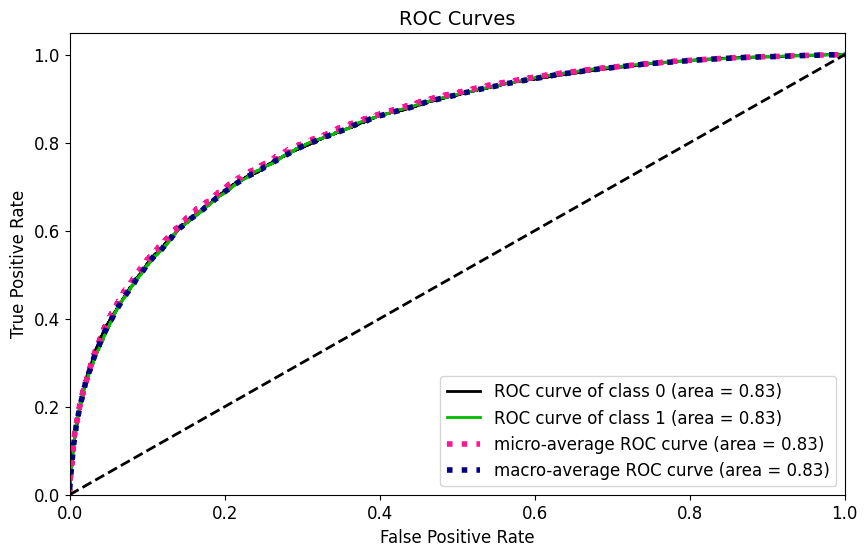

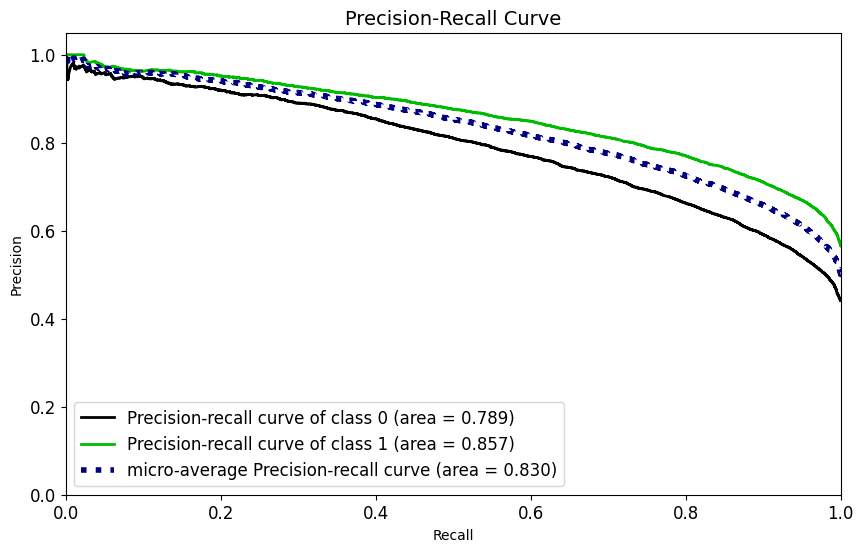

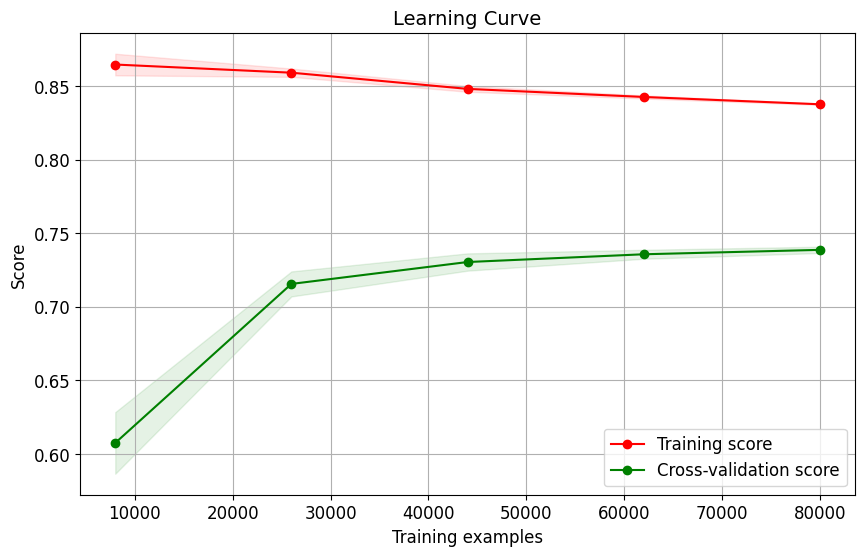

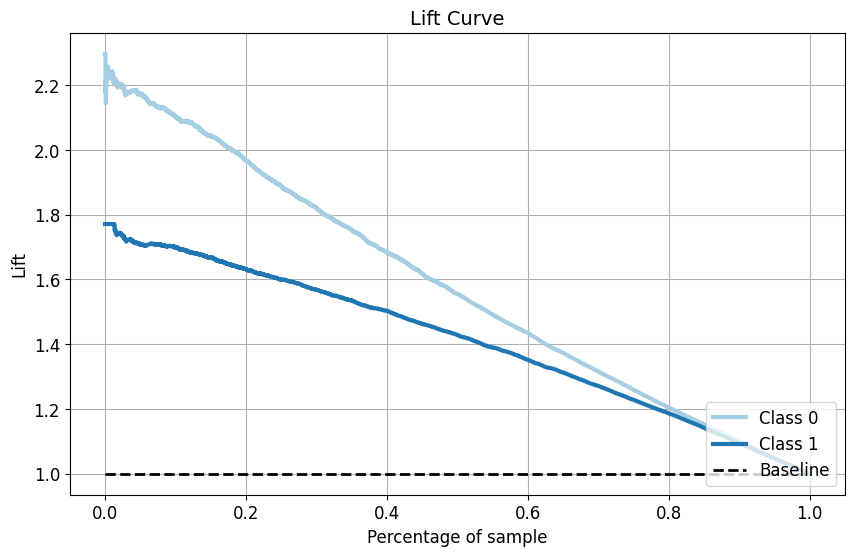

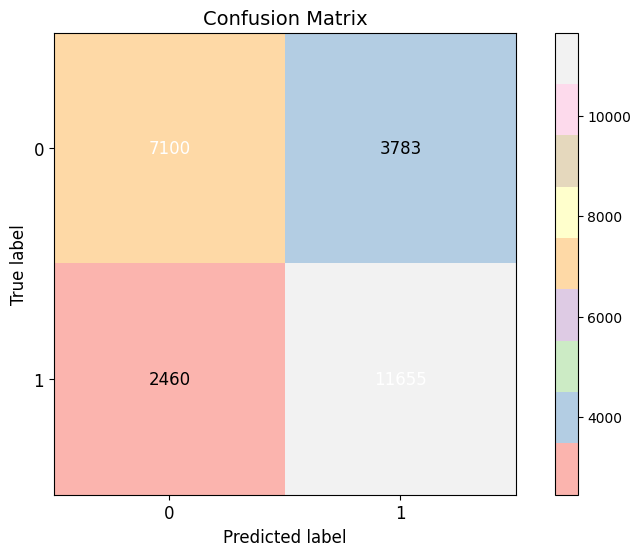

              precision    recall  f1-score   support

           0       0.74      0.65      0.69     10883
           1       0.75      0.83      0.79     14115

    accuracy                           0.75     24998
   macro avg       0.75      0.74      0.74     24998
weighted avg       0.75      0.75      0.75     24998



In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

#### Decision Tree Classifier
Decision Trees are a non-parametric supervised learning method used for both classification and regression tasks.Tree models where the target variable can take a discrete set of values are called classification trees.

Accuracy: 57.71661732938635
Training Score:
 57.870944513341605


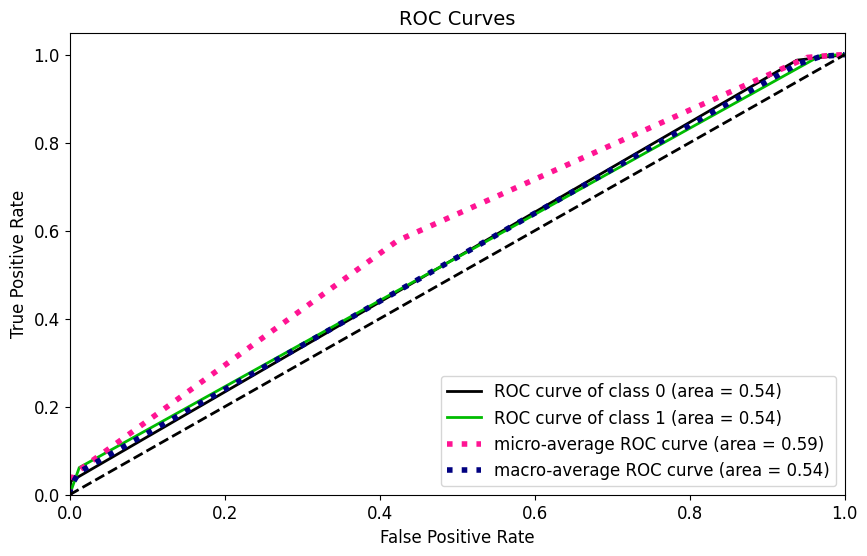

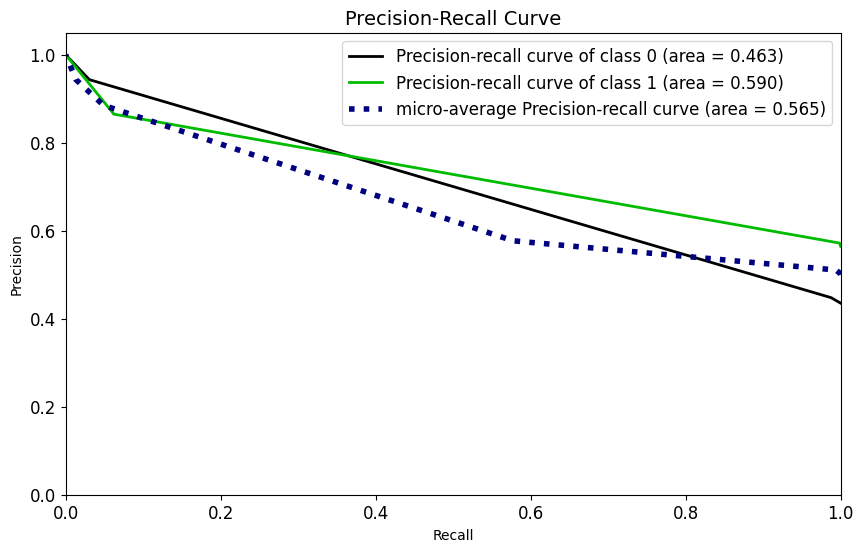

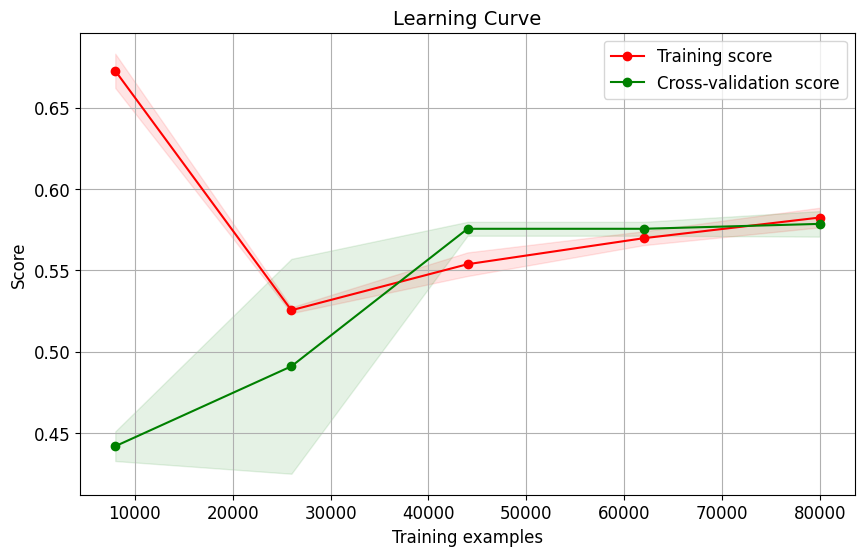

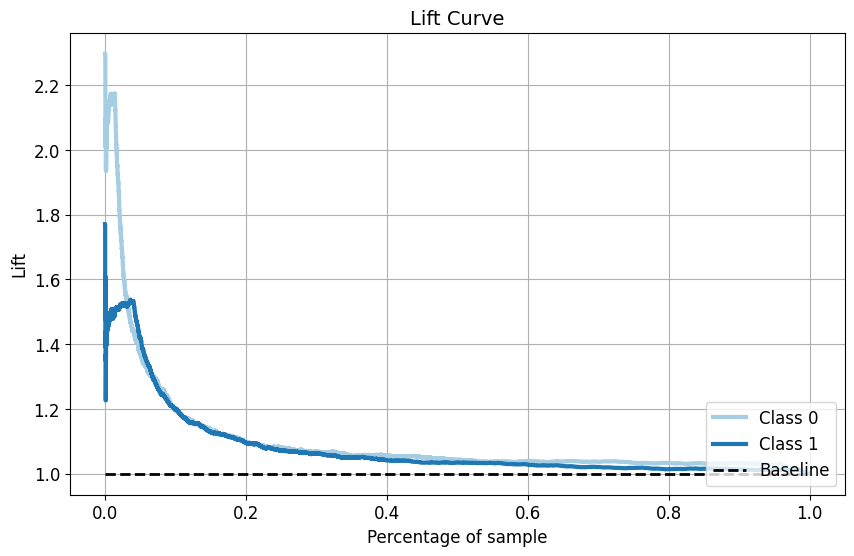

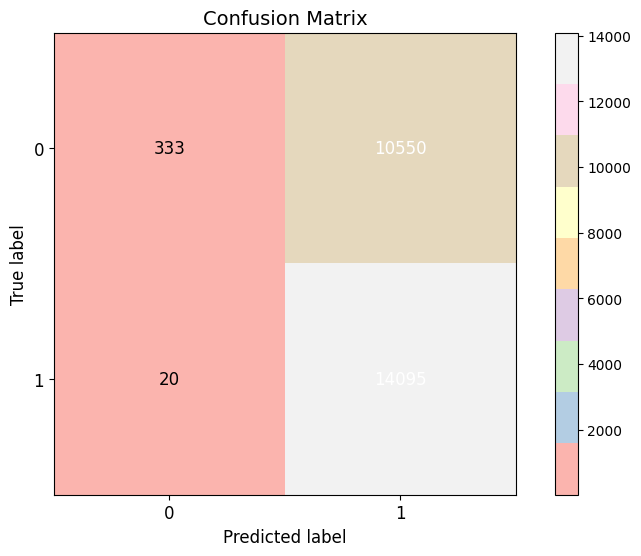

              precision    recall  f1-score   support

           0       0.94      0.03      0.06     10883
           1       0.57      1.00      0.73     14115

    accuracy                           0.58     24998
   macro avg       0.76      0.51      0.39     24998
weighted avg       0.73      0.58      0.44     24998



[Text(248.0, 308.0, 'X[71753] <= 0.125\ngini = 0.492\nsamples = 74991\nvalue = [32649, 42342]'),
 Text(124.0, 184.79999999999998, 'X[77716] <= 0.061\ngini = 0.489\nsamples = 73793\nvalue = [31523, 42270]'),
 Text(62.0, 61.599999999999966, 'gini = 0.493\nsamples = 70742\nvalue = [31143, 39599]'),
 Text(186.0, 61.599999999999966, 'gini = 0.218\nsamples = 3051\nvalue = [380, 2671]'),
 Text(372.0, 184.79999999999998, 'X[51428] <= 0.25\ngini = 0.113\nsamples = 1198\nvalue = [1126, 72]'),
 Text(310.0, 61.599999999999966, 'gini = 0.109\nsamples = 1194\nvalue = [1125, 69]'),
 Text(434.0, 61.599999999999966, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]')]

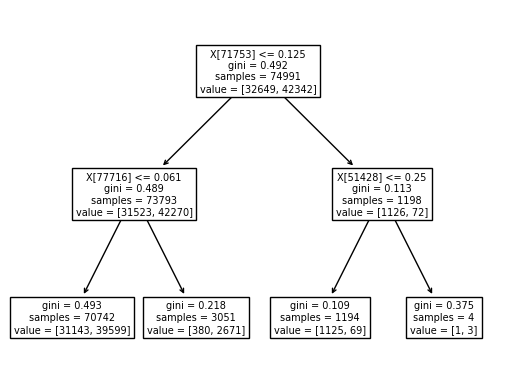

In [41]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth = 2)
classify(tree_clf,X,y)
tree.plot_tree(tree_clf)

#### NAIVE BAYES
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.
In Naive Bayes we can use :
GaussianNB, BernoulliNB and MultinomialNB

Accuracy: 73.49787983038642
Training Score:
 87.49316584656826


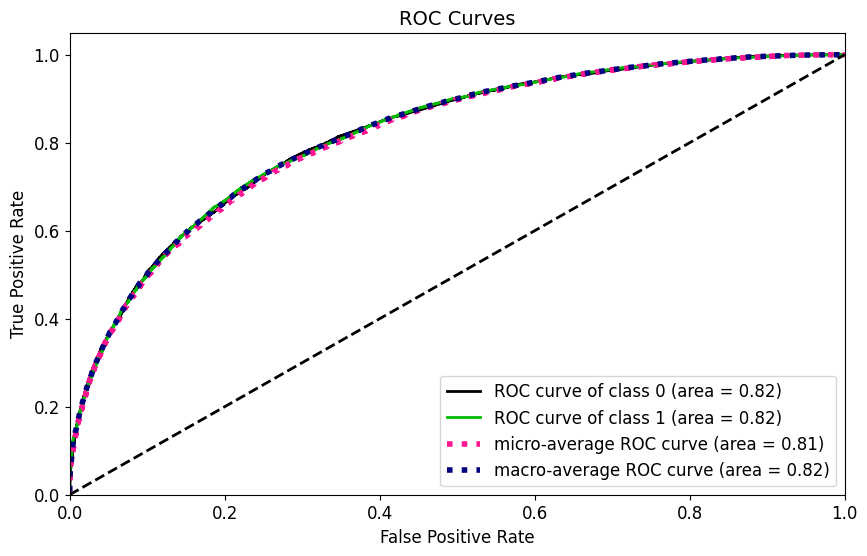

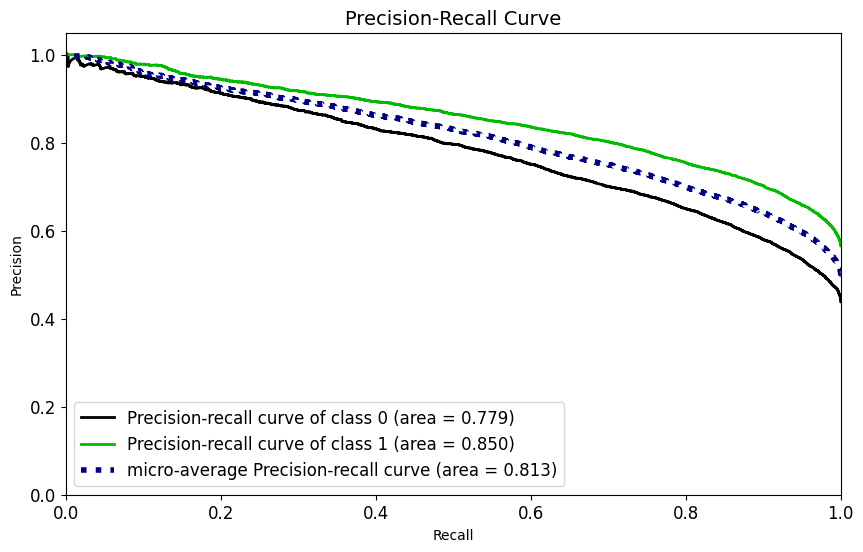

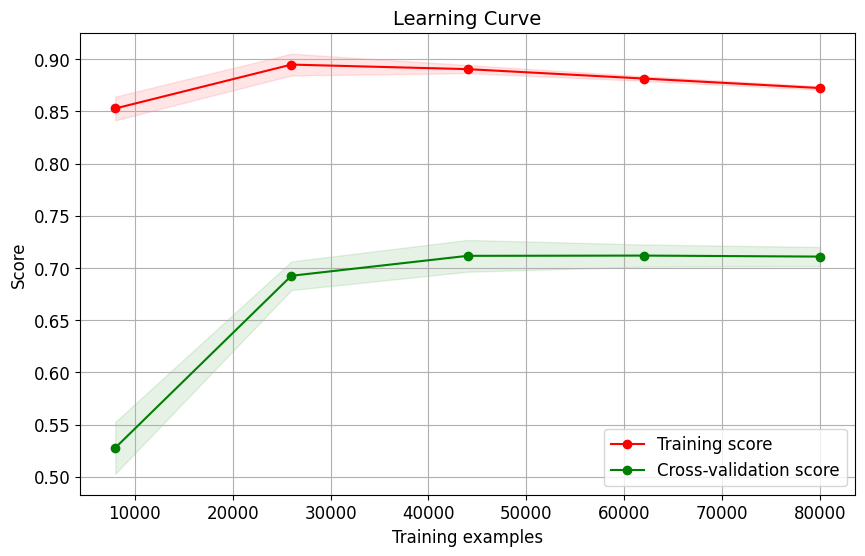

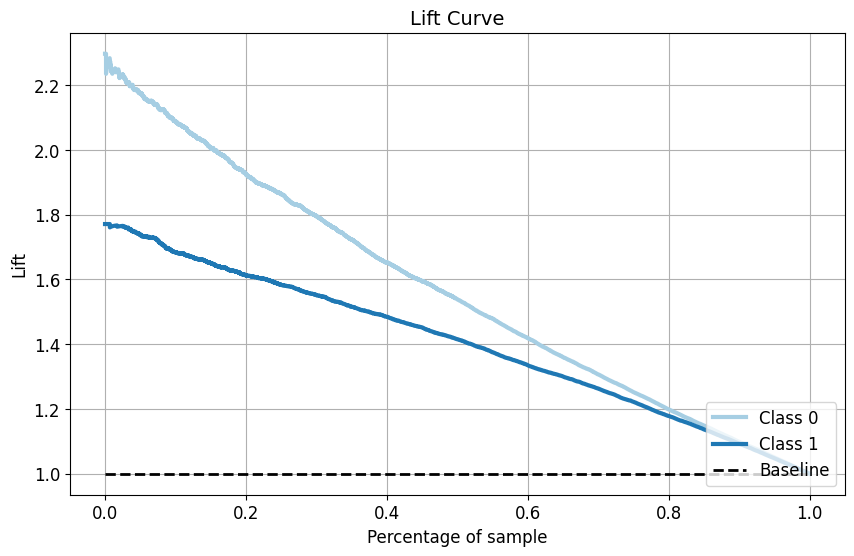

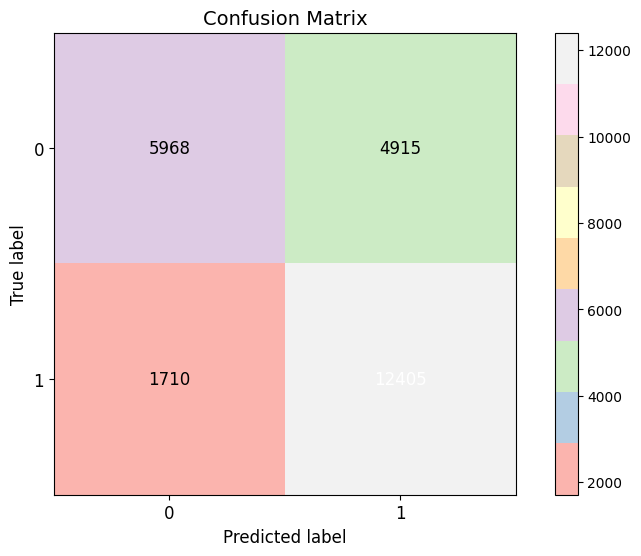

              precision    recall  f1-score   support

           0       0.78      0.55      0.64     10883
           1       0.72      0.88      0.79     14115

    accuracy                           0.73     24998
   macro avg       0.75      0.71      0.72     24998
weighted avg       0.74      0.73      0.73     24998



In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

#### ADA BOOST CLASSIFIER
Ada-boost or Adaptive Boosting is one of ensemble boosting classifier proposed by Yoav Freund and Robert Schapire in 1996. It combines multiple classifiers to increase the accuracy of classifiers. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set.

Accuracy: 67.03336266901351
Training Score:
 67.22673387473164


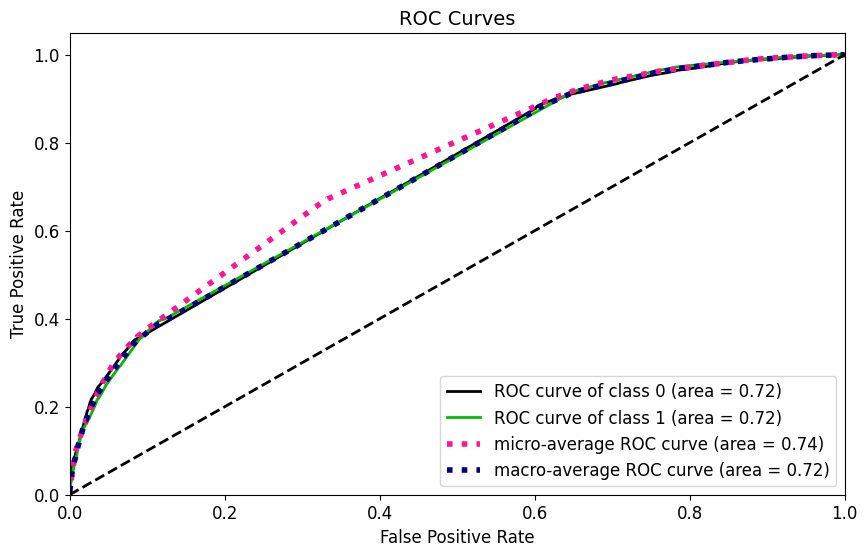

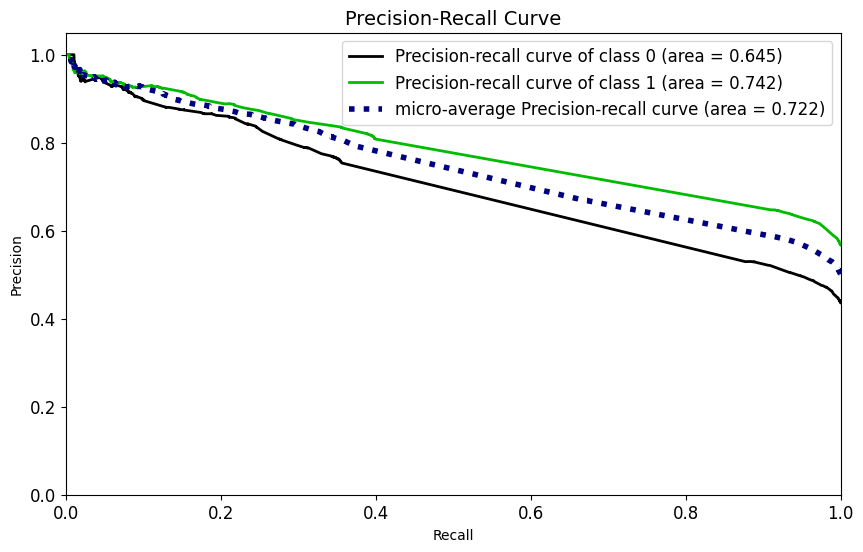

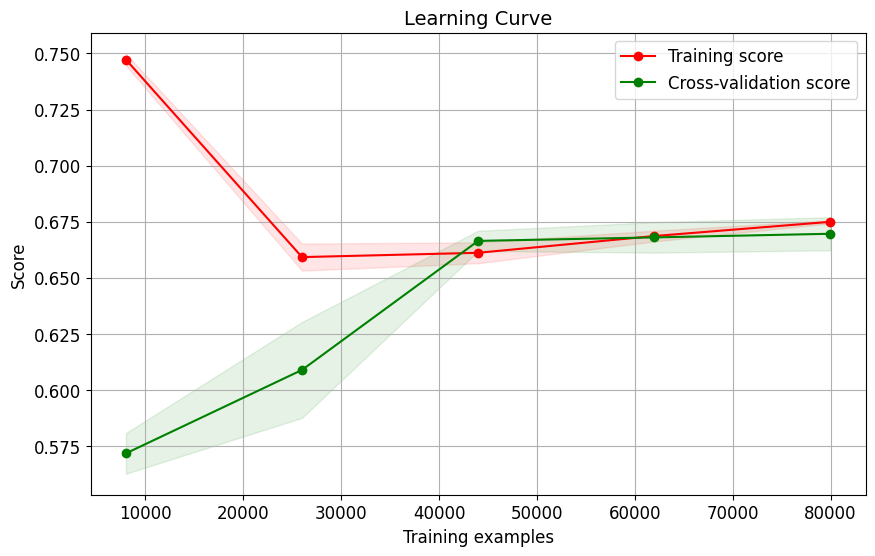

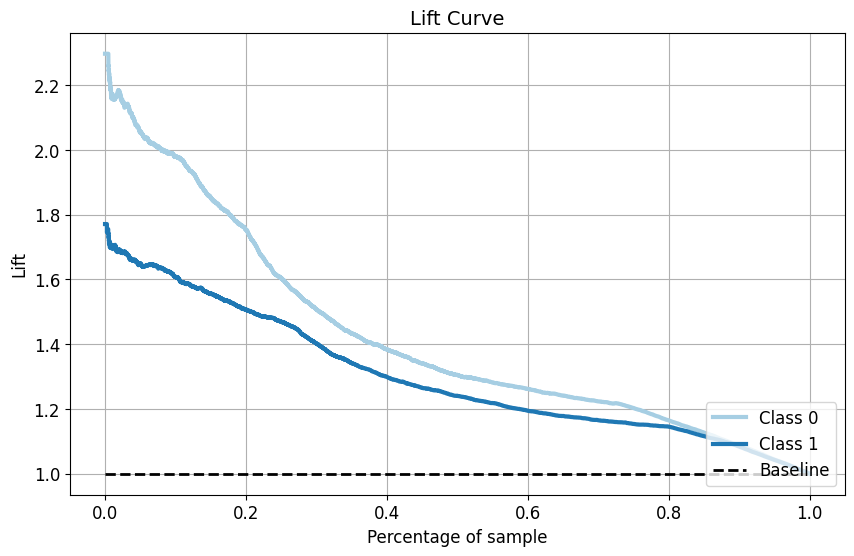

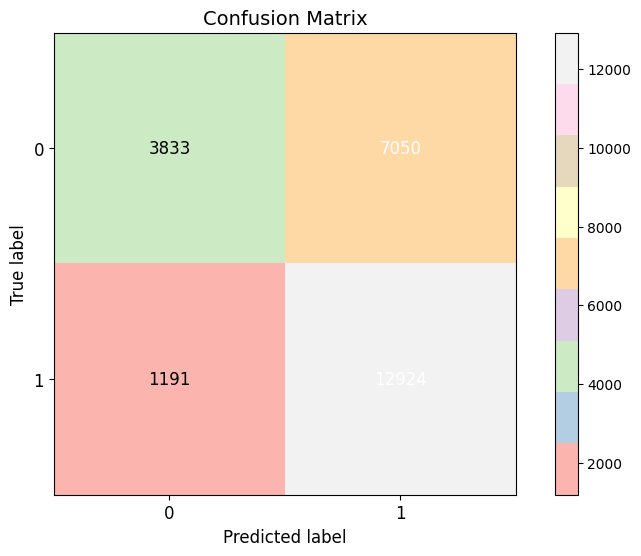

              precision    recall  f1-score   support

           0       0.76      0.35      0.48     10883
           1       0.65      0.92      0.76     14115

    accuracy                           0.67     24998
   macro avg       0.70      0.63      0.62     24998
weighted avg       0.70      0.67      0.64     24998



In [43]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier(base_estimator = None)
classify(model, X, y)

#### Conclusion

Upon exectution of the algorithms, we can observe that Naive Bayes got a training accuracy of 88% and Logistic Regression got 84% training accuracy.